<xarray.DataArray 'SCL_20m' (time: 2, y: 427, x: 757)>
array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])
Coordinates:
  * time         (time) datetime64[ns] 2022-08-23T05:14:41.977841 2023-02-09T...
  * y            (y) float64 1.998e+06 1.998e+06 ... 1.985e+06 1.985e+06
  * x            (x) float64 7.795e+06 7.795e+06 ... 7.817e+06 7

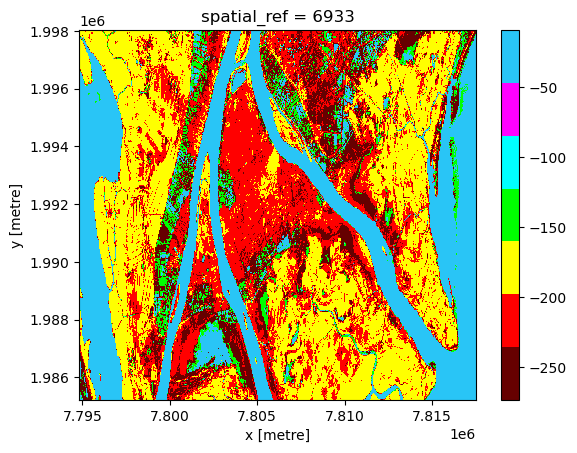

In [6]:
import datacube
import xarray as xr
import matplotlib.colors as colors


# Connect to the datacube
dc = datacube.Datacube(app='LST_Sentinel2')

# Define the product and query parameters
product = 's2a_sen2cor_granule'
# query = {
#     'time': ('2021-01-01', '2021-12-31'),
#     'geopolygon': {
#         'type': 'Polygon',
#         'coordinates': [[[20, -35], [20, -36], [21, -36], [21, -35], [20, -35]]]
#     },
#     'resolution': (-20, 20),
#     'output_crs': 'EPSG:4326'
# }

# Load the data and calculate LST
# ds = dc.load(product=product, **query)
lat_range = (15.75418332, 15.85828652)
lon_range = (80.78694696, 81.02203692)
time_range = ('2022-01-15', '2023-02-15')
ds = dc.load(product="s2a_sen2cor_granule",
                 measurements=["B04_10m","B03_10m","B02_10m", "B08_10m", "B11_20m", "SCL_20m"],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs='EPSG:6933',
             resolution=(-30, 30))
ndvi = (ds.B08_10m - ds.B04_10m) / (ds.B08_10m + ds.B04_10m)
emissivity = 0.95
kelvin = 273.15
lst = kelvin / (emissivity * (1 / ndvi) + 1) - kelvin

# Plot the LST
lst_cmap = colors.ListedColormap(['#660000', '#FF0000', '#FFFF00', '#00FF00', '#00FFFF', '#FF00FF', '#29C5F6'])
lst.mean(dim='time').plot(cmap=lst_cmap)

scl = ds['SCL_20m']
clear_pixels = (scl != 3) & (scl != 8) & (scl != 9)
print(clear_pixels)
ndvi_masked = ndvi.where(clear_pixels)
print(ndvi_masked)

In [2]:
import datacube
import xarray as xr
from deafrica_tools.datahandling import load_ard

# Define the area of interest
lat, lon = 15.75, 80.78
buffer = 0.1
query = {
    'x': (lon - buffer, lon + buffer),
    'y': (lat + buffer, lat - buffer),
    'time': ('2022-06-01', '2023-06-30'),
    'measurements': ['B04_10m'],
    'resolution': (-30, 30),
    'output_crs': 'EPSG:4326'
}

dc = datacube.Datacube(app = "Mangroves")

# Load the data using the load_ard function
ds = load_ard(dc=dc, products=['s2a_sen2cor_granule'],
              group_by='solar_day', **query)

# Plot the mean LST
ds.LST.mean(dim='time').plot()


Using pixel quality parameters for Sentinel 2
Finding datasets
    s2a_sen2cor_granule


AttributeError: 'NoneType' object has no attribute 'begin'